### **1次元ガウス分布 最尤推定**

In [444]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

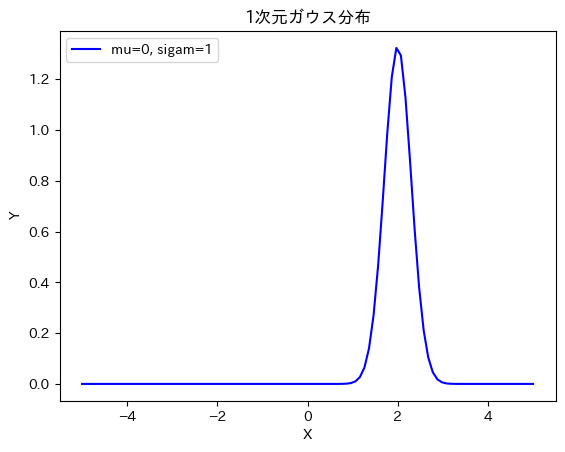

In [445]:
# 1次元ガウス分布
def gaussian1D(x, mu, sigma):
    z=-(x-mu)**2
    z/=2*sigma**2
    y=np.exp(z)
    y/=np.sqrt(2*np.pi*sigma**2)
    return y

# 平均パラメータ
mu=2.0
# 標準偏差
sigma=0.3
x=np.linspace(-5, 5, 100)
y=np.array([gaussian1D(xi, mu, sigma) for xi in x])

plt.title('1次元ガウス分布')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, c='b', label='mu=0, sigam=1')
plt.legend()
plt.show()

In [446]:
# 平均パラメータ推定
def mu_inference(x):
    return np.mean(x)

# 分散パラメータ推定
def sigma_inference(x, mu):
    return np.std(x)

# 対数尤度
def log_likelihood(x, mu, sigma):
    lik=(np.sum(x) - len(x) * mu)**2
    lik/=-2*sigma**2
    lik-=len(x) * np.log(2*np.pi*sigma**2) * 0.5
    return lik

# フィッティング処理
def fit(x, epoch=100):
    # パラメータ初期値をガウス分布からサンプリング
    mu=np.random.normal(0,1)
    sigma=np.random.normal(0,1)
    # 初期値に対する対数尤度を計算
    lik=log_likelihood(x, mu, sigma)

    likes=[lik]
    for n in range(epoch):
        mu=mu_inference(x)
        sigma=sigma_inference(x, mu)
        lik=log_likelihood(x, mu, sigma)
        likes.append(lik)
        if abs(likes[n] - likes[n-1]) < 1e-7:
            return mu, sigma, likes
    return mu, sigma, likes

In [447]:
x=np.random.normal(2, 0.3, 100)
x

array([2.04503684, 1.89601188, 1.55420599, 2.04056453, 2.04369158,
       1.41799614, 2.17793249, 1.60652286, 1.95314557, 1.78274471,
       1.87149617, 1.52236904, 2.4190843 , 1.51535837, 2.11216539,
       2.34288412, 2.13087298, 1.73421367, 2.5613218 , 2.47222695,
       2.01723359, 1.96094666, 1.89250661, 1.90324048, 1.69908413,
       1.35368443, 2.48886589, 2.21257688, 2.272654  , 1.97973831,
       2.07725799, 1.36291697, 1.76722067, 1.49281862, 1.92048924,
       2.61835774, 1.47106127, 1.68788172, 1.69811054, 2.35925328,
       1.85888342, 2.28982362, 1.86660501, 1.8322446 , 2.34797157,
       2.11972747, 1.69984535, 1.58913501, 2.56214797, 1.92758116,
       2.41362856, 1.58164976, 2.02052597, 2.00000746, 2.10159659,
       2.41932412, 1.85295209, 1.59939559, 2.05796348, 1.88497097,
       2.17540328, 1.7090727 , 2.37796468, 1.99419903, 2.08234416,
       2.16171485, 1.98390527, 1.40593439, 1.95417251, 2.27365182,
       1.51709033, 2.45402097, 2.03365769, 2.4389135 , 2.06610

1.9951746719784322
0.3136982951243603


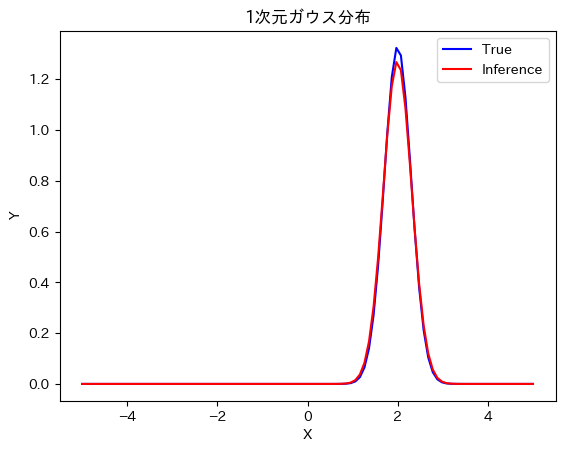

In [448]:
# パラメータ推定
mu, sigma, likes=fit(x)
print(mu)
print(sigma)
# 平均パラメータ
mu_true=2.0
# 標準偏差
sigma_true=0.3
x=np.linspace(-5, 5, 100)
y_true=np.array([gaussian1D(xi, mu_true, sigma_true) for xi in x])
y=np.array([gaussian1D(xi, mu, sigma) for xi in x])
plt.title('1次元ガウス分布')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_true, c='b', label='True')
plt.plot(x, y, c='r', label='Inference')
plt.legend()
plt.show()

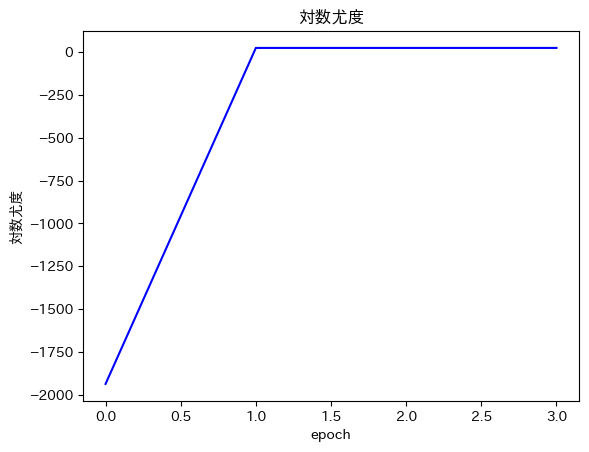

In [449]:
epoch=[e for e in range(len(likes))]
plt.plot(epoch, likes, c='b', label='log likelihood')
plt.title('対数尤度')
plt.xlabel('epoch')
plt.ylabel('対数尤度')
plt.show()

### **ニュートン法**

In [450]:
# 差分方程式
def difference(yx, dyx, x, dx):
    h=dx
    dy=yx - dyx
    dy/=h+1e-7
    return dy

# 対数尤度
def log_likelihood(x, mu, sigma):
    lik=(np.sum(x) - len(x) * mu)**2
    lik/=-2*sigma**2
    lik-=len(x) * np.log(2*np.pi*sigma**2) * 0.5
    return lik

# ニュートン法 標準偏差パラメータ
def newton(x, mu, sigma, dmu, dsigma, epoch=100):
    dp=np.array([dmu, dsigma])
    p=np.array([mu, sigma])
    df=np.array([0.0, 0.0])
    # ヘッセ行列
    H=np.array([
        [0.0, 0.0], 
        [0.0, 0.0]
        ])
    lik=log_likelihood(x, mu, sigma)
    likes=[lik]
    for n in range(epoch):
        # 平均パラメータ df/dmu
        yx=log_likelihood(x, p[0], p[1])
        dyx=log_likelihood(x, p[0]+dp[0], p[1])
        df[0]=difference(yx, dyx, p[0], dp[0])

        # 標準偏差パラメータ df/dsigma
        yx=log_likelihood(x, p[0], p[1])
        dyx=log_likelihood(x, p[0], p[1]+dp[1])
        df[1]=difference(yx, dyx, p[1], dp[1])

        # 平均パラメータ df/dmudmu
        yx=log_likelihood(x, mu+dp[0], p[1])
        dyx=log_likelihood(x, mu+2*dp[0], p[1])
        yx=difference(yx, dyx, p[0], dp[0])
        H[0,0]=difference(df[0], yx, p[0], dp[0])

        # 標準偏差パラメータ df/dsigma
        yx=log_likelihood(x, p[1], p[0])
        dyx=log_likelihood(x, p[0], p[1])
        yx=difference(yx, dyx, p[0], dp[0])
        H[0,1]=difference(df[0], dyx, p[1], dp[1])
        H[1,0]=H[0,1]

        # 標準偏差パラメータ df/dsigmadsigma
        yx=log_likelihood(df[1], p[0], p[1])
        dyx=log_likelihood(df[1], p[0], dp[1])
        H[1,1]=difference(yx, dyx, p[1], dp[1])

        # 逆行列
        dp=df*np.linalg.inv(H)
        # パラメータを更新
        p=p+dp

        lik=log_likelihood(x, p[0], p[1])
        likes.append(lik)
        if abs(likes[n] - likes[n-1]) < 1e-7:
            return p[0], p[1], likes
    return p[0], p[1], likes

# フィッティング処理
def fit(x):
    mu=np.random.normal(0,1)
    sigma=np.random.normal(0,1)
    dmu=0.01
    dsigma=0.01
    mu, sigma, likes=newton(x, mu, sigma, dmu, dsigma)
    return mu, sigma, likes

x=np.random.normal(2, 0.3, 100)
mu, sigma, likes=fit(x)

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
# パラメータ推定
mu, sigma, likes=fit(x)
print(mu)
print(sigma)
# 平均パラメータ
mu_true=2.0
# 標準偏差
sigma_true=0.3
x=np.linspace(-5, 5, 100)
y_true=np.array([gaussian1D(xi, mu_true, sigma_true) for xi in x])
y=np.array([gaussian1D(xi, mu, sigma) for xi in x])
plt.title('1次元ガウス分布')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_true, c='b', label='True')
plt.plot(x, y, c='r', label='Inference')
plt.legend()
plt.show()

TypeError: object of type 'numpy.float64' has no len()

In [386]:
likes

[-218952.73942424502,
 -772.6174780099113,
 -772.4880379038464,
 -772.6762286878492,
 -772.4632628317105,
 -772.4970515483324,
 -782.4337453741387,
 -782.4219780814293,
 -815.9550389160179,
 -815.9201443163258,
 -817.0658233299978,
 -817.0668990115843,
 -1113.3828527125654,
 -1113.297639456528,
 -1113.2976213424236,
 -1313.930660248126,
 -1313.8647660603526,
 -1313.8648141884266,
 -1314.0735506036563,
 -1314.073392469412,
 -1314.0862046588975,
 -1314.086208214397,
 -1343.858135436171,
 -1343.8389730778824,
 -1343.8389829910877,
 -1345.645308588662,
 -1345.6439783032902,
 -1345.6439355663013,
 -1345.7242746102645,
 -1345.7242157867843,
 -1345.7647468728412,
 -1345.764718618039,
 -1345.9549950240441,
 -1345.9548541034228,
 -1345.9605056170544,
 -1345.9605186518597,
 -1346.9525742851995,
 -1346.9518414488027,
 -1346.9518371472866,
 -1355.0719686864616,
 -1355.0662129662435,
 -1355.0662047773592,
 -1356.845912439978,
 -1356.84461240121,
 -1356.8445744522953,
 -1356.9168423692033,
 -1356.91

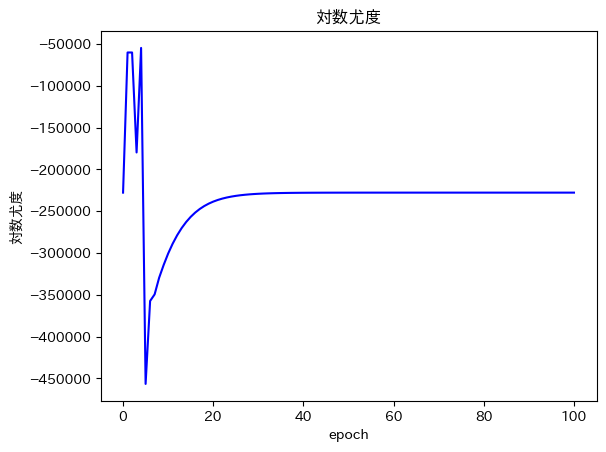

In [ ]:
epoch=[e for e in range(len(likes))]
plt.plot(epoch, likes, c='b', label='log likelihood')
plt.title('対数尤度')
plt.xlabel('epoch')
plt.ylabel('対数尤度')
plt.show()